In [ ]:
project title-loan prediction 

LINKS RELATED TO PROJECT 

f1-scores and accuracies - https://buffalo.box.com/s/f35i4pfe75kk7y32pesxi3839wnidm69 

VIDEO -  https://buffalo.box.com/s/48apuk09ezfz2ke48hio01gnpk81dqka 

MLFLOW -  https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0?searchFilter=&orderByKey=attributes.start_time&orderByAsc=false&startTime=ALL&lifecycleFilter=Active&modelVersionFilter=All+Runs&datasetsFilter=W10%3D

DAGSHUB - https://dagshub.com/nithinyanna3/my-first-repo/experiments 

DOCKER - https://hub.docker.com/r/nithinyanna/fastapi-app/tags

Streamlit(cloud deployment) - https://streamlit-app-p2gr.onrender.com/ 

creating a database and loading with the data

In [5]:
import sqlite3
import pandas as pd
import csv

# Connect to SQLite database (or create it)
conn = sqlite3.connect("loan_db.db")
cursor = conn.cursor()

# Create tables (Person, Loan, Credit, LoanStatus)
cursor.execute('''CREATE TABLE IF NOT EXISTS Person (
                    person_id INTEGER PRIMARY KEY,
                    person_age INTEGER,
                    person_income INTEGER,
                    person_home_ownership TEXT,
                    person_emp_length INTEGER);''')

cursor.execute('''CREATE TABLE IF NOT EXISTS Loan (
                    loan_id INTEGER PRIMARY KEY,
                    person_id INTEGER,
                    loan_intent TEXT,
                    loan_grade TEXT,
                    loan_amnt INTEGER,
                    loan_int_rate REAL,
                    loan_percent_income REAL,
                    FOREIGN KEY(person_id) REFERENCES Person(person_id));''')
cursor.execute('''CREATE TABLE IF NOT EXISTS Credit (
                    credit_id INTEGER PRIMARY KEY,
                    person_id INTEGER,
                    cb_person_default_on_file TEXT,
                    cb_person_cred_hist_length INTEGER,
                    FOREIGN KEY(person_id) REFERENCES Person(person_id));''')

cursor.execute('''CREATE TABLE IF NOT EXISTS LoanStatus (
                    loan_status_id INTEGER PRIMARY KEY,
                    loan_id INTEGER,
                    loan_status INTEGER,
                    FOREIGN KEY(loan_id) REFERENCES Loan(loan_id));''')

# Parse the CSV file and insert data into tables
with open("C:\\Users\\HP\\Downloads\\train.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Insert into Person table
        cursor.execute('''INSERT OR IGNORE INTO Person (person_id, person_age, person_income, person_home_ownership, person_emp_length)
                          VALUES (?, ?, ?, ?, ?)''', 
                       (row['id'], row['person_age'], row['person_income'], row['person_home_ownership'], row['person_emp_length']))
        
        # Insert into Loan table
        cursor.execute('''INSERT OR IGNORE INTO Loan (loan_id, person_id, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_percent_income)
                          VALUES (?, ?, ?, ?, ?, ?, ?)''',
                       (row['id'], row['id'], row['loan_intent'], row['loan_grade'], row['loan_amnt'], row['loan_int_rate'], row['loan_percent_income']))
        cursor.execute('''INSERT OR IGNORE INTO Credit (credit_id, person_id, cb_person_default_on_file, cb_person_cred_hist_length)
                          VALUES (?, ?, ?, ?)''',
                       (row['id'], row['id'], row['cb_person_default_on_file'], row['cb_person_cred_hist_length']))
        
        # Insert into LoanStatus table
        cursor.execute('''INSERT OR IGNORE INTO LoanStatus (loan_status_id, loan_id, loan_status)
                          VALUES (?, ?, ?)''',
                       (row['id'], row['id'], row['loan_status']))

# Commit the changes and close the connection
conn.commit()
        
        # Insert into Credit table


joining tables via sql queries

In [9]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("normalized_db.db")

# SQL query to join the tables and reconstruct the data
query = """
SELECT p.person_id, p.person_age, p.person_income, p.person_home_ownership, p.person_emp_length,
       l.loan_id, l.loan_intent, l.loan_grade, l.loan_amnt, l.loan_int_rate, l.loan_percent_income,
       c.cb_person_default_on_file, c.cb_person_cred_hist_length, ls.loan_status
FROM Person p
JOIN Loan l ON p.person_id = l.person_id
JOIN Credit c ON p.person_id = c.person_id
JOIN LoanStatus ls ON l.loan_id = ls.loan_id;
"""

# Execute the query and load the result into a Pandas DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Print the resulting DataFrame
print(df)

       person_id  person_age  person_income person_home_ownership  \
0              0          37          35000                  RENT   
1              1          22          56000                   OWN   
2              2          29          28800                   OWN   
3              3          30          70000                  RENT   
4              4          22          60000                  RENT   
...          ...         ...            ...                   ...   
58640      58640          34         120000              MORTGAGE   
58641      58641          28          28800                  RENT   
58642      58642          23          44000                  RENT   
58643      58643          22          30000                  RENT   
58644      58644          31          75000              MORTGAGE   

       person_emp_length  loan_id loan_intent loan_grade  loan_amnt  \
0                      0        0   EDUCATION          B       6000   
1                      6     

removing non data

In [12]:
df = df.dropna(how='all')

removing duplicate rows 

In [18]:
df = df.drop_duplicates()

remove rows with missing data NAN

In [22]:
df = df.dropna(how='any')

exploring the dataset 

In [25]:
 # Print the entire DataFrame
print(df)

# Print summary statistics
print(df.describe())

# Print DataFrame information
print(df.info())


       person_id  person_age  person_income person_home_ownership  \
0              0          37          35000                  RENT   
1              1          22          56000                   OWN   
2              2          29          28800                   OWN   
3              3          30          70000                  RENT   
4              4          22          60000                  RENT   
...          ...         ...            ...                   ...   
58640      58640          34         120000              MORTGAGE   
58641      58641          28          28800                  RENT   
58642      58642          23          44000                  RENT   
58643      58643          22          30000                  RENT   
58644      58644          31          75000              MORTGAGE   

       person_emp_length  loan_id loan_intent loan_grade  loan_amnt  \
0                      0        0   EDUCATION          B       6000   
1                      6     

In [29]:
print(df.dtypes)

person_id                       int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_id                         int64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


In [32]:
loan_grade_weights = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
df['loan_grade'] = df['loan_grade'].map(loan_grade_weights)

# Importance weights for person_home_ownership
home_ownership_weights = {'Own': 1, 'Mortgage': 2, 'Rent': 3}
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_weights)

# Importance weights for loan_intent
loan_intent_weights = {'Personal': 3, 'Business': 2, 'Education': 1}
df['loan_intent'] = df['loan_intent'].map(loan_intent_weights)

# Importance weights for cb_person_default_on_file
default_on_file_weights = {'No': 1, 'Yes': 2}
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(default_on_file_weights)

# Handling missing or unrecognized categories by filling with default values (0 or a relevant number)
df['loan_grade'] = df['loan_grade'].fillna(0).astype(int)
df['person_home_ownership'] = df['person_home_ownership'].fillna(0).astype(int)
df['loan_intent'] = df['loan_intent'].fillna(0).astype(int)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].fillna(0).astype(int)

# Display the updated DataFrame
print(df.head())

   person_id  person_age  person_income  person_home_ownership  \
0          0          37          35000                      0   
1          1          22          56000                      0   
2          2          29          28800                      0   
3          3          30          70000                      0   
4          4          22          60000                      0   

   person_emp_length  loan_id  loan_intent  loan_grade  loan_amnt  \
0                  0        0            0           2       6000   
1                  6        1            0           3       4000   
2                  8        2            0           1       6000   
3                 14        3            0           2      12000   
4                  2        4            0           1       6000   

   loan_int_rate  loan_percent_income  cb_person_default_on_file  \
0          11.49                 0.17                          0   
1          13.35                 0.07               

In [35]:
import pandas as pd

# Ordinal encoding for loan_grade
loan_grade_weights = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
df['loan_grade'] = df['loan_grade'].map(loan_grade_weights).fillna(0).astype(int)

# Binary encoding for cb_person_default_on_file
default_on_file_weights = {'N': 0, 'Y': 1}
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(default_on_file_weights).fillna(0).astype(int)

# One-Hot Encoding for nominal features
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

# Display updated DataFrame
print(df.head())


   person_id  person_age  person_income  person_emp_length  loan_id  \
0          0          37          35000                  0        0   
1          1          22          56000                  6        1   
2          2          29          28800                  8        2   
3          3          30          70000                 14        3   
4          4          22          60000                  2        4   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           0       6000          11.49                 0.17   
1           0       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           0      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                          0                          14            0  
1                          0                

saving the data as firstupdate for no  confusion

In [39]:
# Save the updated DataFrame in the Jupyter environment with a new variable name
firstupdate = df.copy()

# Save the new DataFrame to a CSV file
output_path_firstupdate = "C:\\Users\\HP\\Downloads\\firstupdate.csv"  # Replace with desired path
firstupdate.to_csv(output_path_firstupdate, index=False)

print("DataFrame has been saved in the environment as 'firstupdate'")
print(f"DataFrame saved to system as: {output_path_firstupdate}")
print(firstupdate.head())  # Display the first few rows


DataFrame has been saved in the environment as 'firstupdate'
DataFrame saved to system as: C:\Users\HP\Downloads\firstupdate.csv
   person_id  person_age  person_income  person_emp_length  loan_id  \
0          0          37          35000                  0        0   
1          1          22          56000                  6        1   
2          2          29          28800                  8        2   
3          3          30          70000                 14        3   
4          4          22          60000                  2        4   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           0       6000          11.49                 0.17   
1           0       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           0      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  l

removing the outliers using mahalonibis distance and saving it as second update

Outlier rows:
       person_id  person_age  person_income  person_emp_length  loan_id  \
91            91          24         225000                  0       91   
583          583          22         250000                  4      583   
597          597          60          45000                  1      597   
967          967          35         150000                 19      967   
1064        1064          46          63000                 19     1064   
...          ...         ...            ...                ...      ...   
57844      57844          55          54000                 17    57844   
58165      58165          27         156000                  9    58165   
58242      58242          53          90000                  7    58242   
58436      58436          53          26500                  1    58436   
58604      58604          62         150000                  3    58604   

       loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
91              0

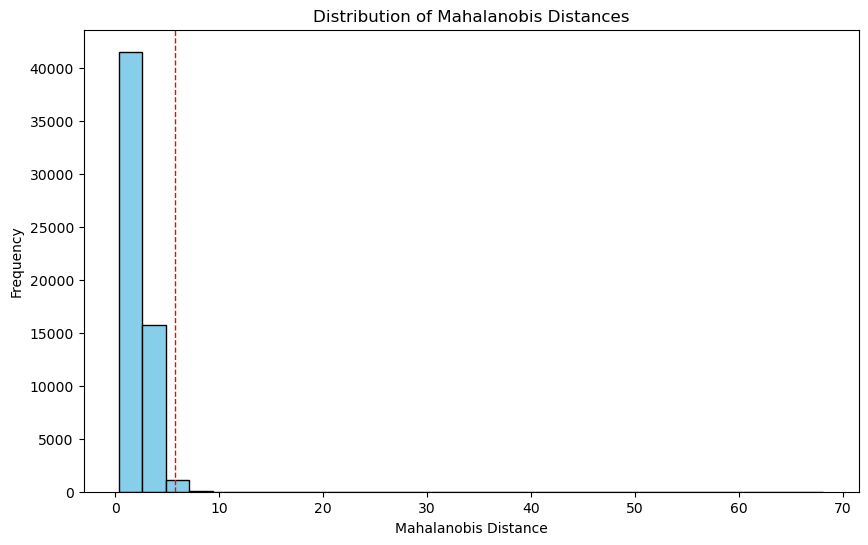

In [53]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the DataFrame from environment
df = firstupdate  # Assuming 'firstupdate' is already available in the environment

# Select predictors
predictors = df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]

# Normalize the predictors
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Calculate the covariance matrix and its inverse
cov_matrix = np.cov(predictors_scaled.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute the Mahalanobis distances
mahal_distances = [distance.mahalanobis(x, np.mean(predictors_scaled, axis=0), inv_cov_matrix) 
                   for x in predictors_scaled]

# Add the Mahalanobis distance to the DataFrame
df['mahalanobis'] = mahal_distances

# Identify outliers (using 99th percentile as threshold)
threshold = np.percentile(df['mahalanobis'], 99)  # 99th percentile
outliers = df[df['mahalanobis'] > threshold]

# Print the rows that are outliers
print("Outlier rows:")
print(outliers)

# Remove outliers and save the cleaned data to 'secondupdate'
secondupdate = df[df['mahalanobis'] <= threshold].drop(columns=['mahalanobis'])

# Print shapes to confirm
print(f"Original shape: {df.shape}, Shape after removing outliers: {secondupdate.shape}")

# Optionally, visualize Mahalanobis distances
plt.figure(figsize=(10, 6))
plt.hist(df['mahalanobis'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1)
plt.title("Distribution of Mahalanobis Distances")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Frequency")
plt.show()



In [56]:
print(secondupdate.head())


   person_id  person_age  person_income  person_emp_length  loan_id  \
0          0          37          35000                  0        0   
1          1          22          56000                  6        1   
2          2          29          28800                  8        2   
3          3          30          70000                 14        3   
4          4          22          60000                  2        4   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           0       6000          11.49                 0.17   
1           0       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           0      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                          0                          14            0  
1                          0                

some exploratory data analysis

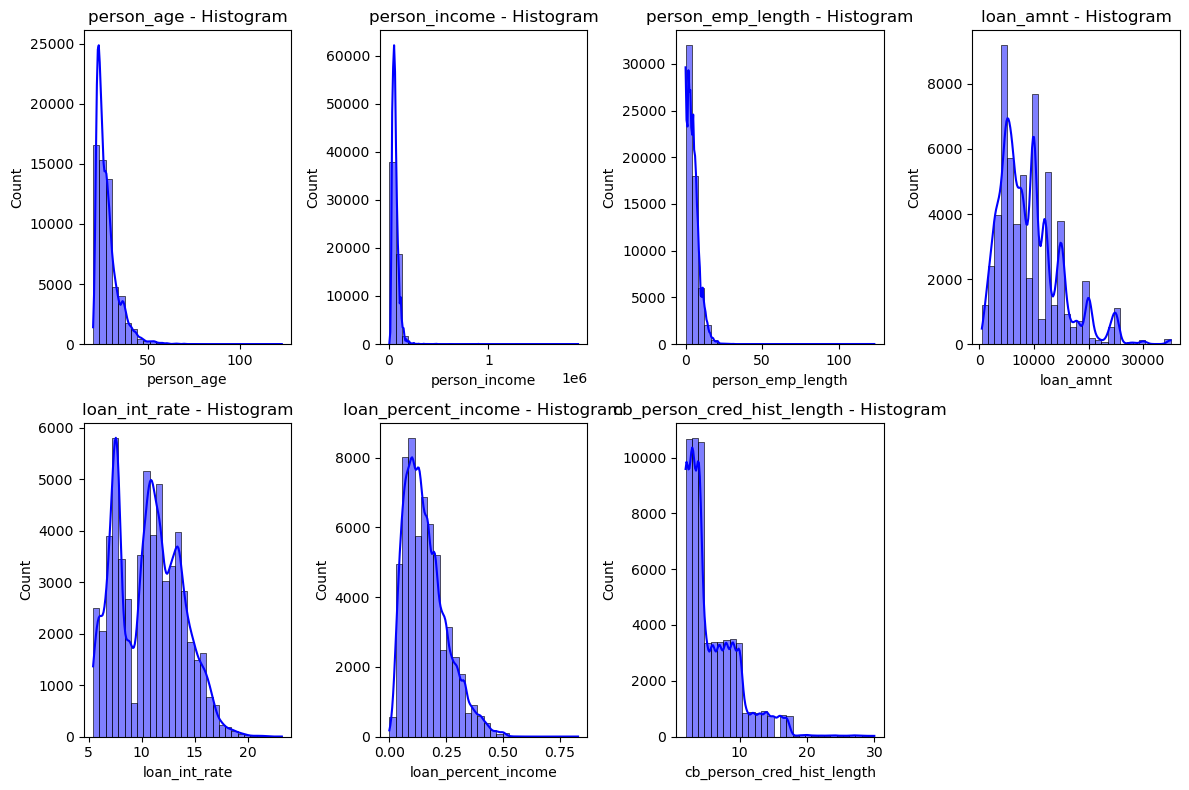

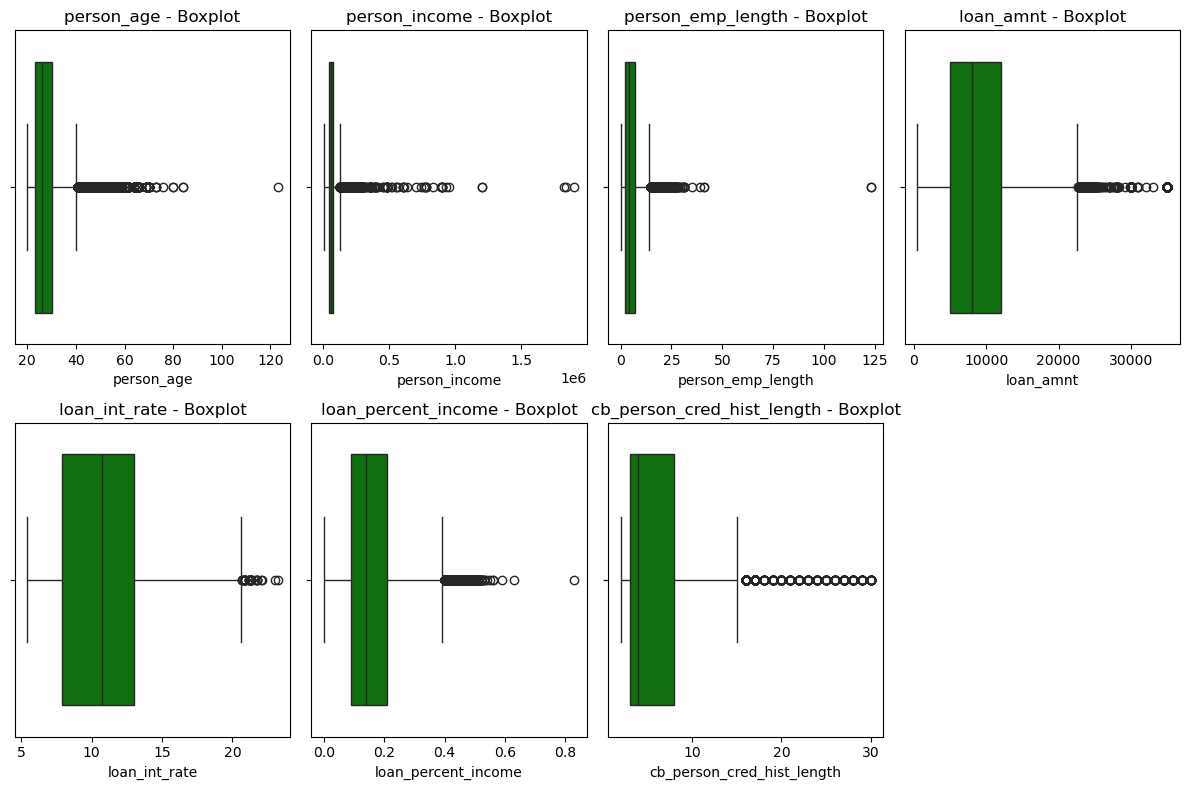

C:\Users\HP\AppData\Local\Temp\ipykernel_18368\2256259307.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')
C:\Users\HP\AppData\Local\Temp\ipykernel_18368\2256259307.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')
C:\Users\HP\AppData\Local\Temp\ipykernel_18368\2256259307.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')
C:\Users\HP\AppData\Local\Temp\ipykernel_18368\2256259307.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabor

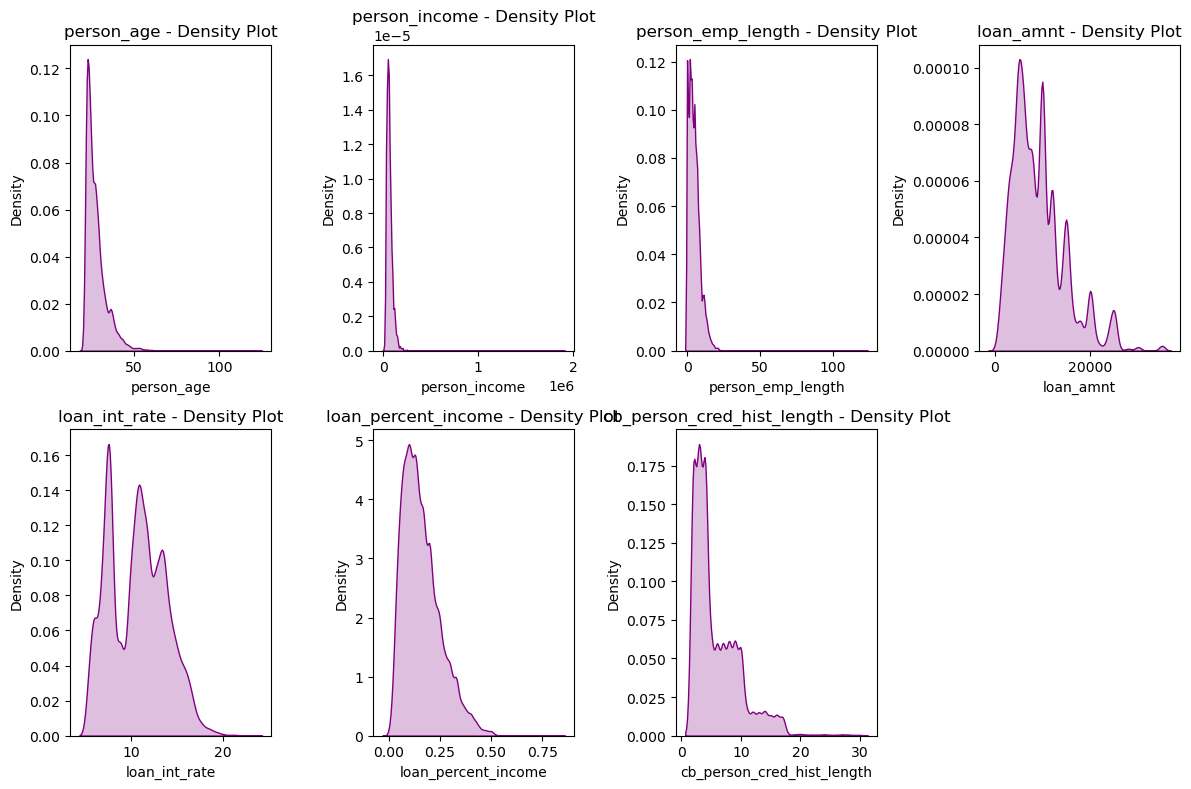

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis: Histogram, Boxplot, and Density Plot

# List of numeric columns
numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                   'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'{col} - Histogram')
plt.tight_layout()
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'{col} - Boxplot')
plt.tight_layout()
plt.show()

# Density Plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.kdeplot(df[col], shade=True, color='purple')
    plt.title(f'{col} - Density Plot')
plt.tight_layout()
plt.show()


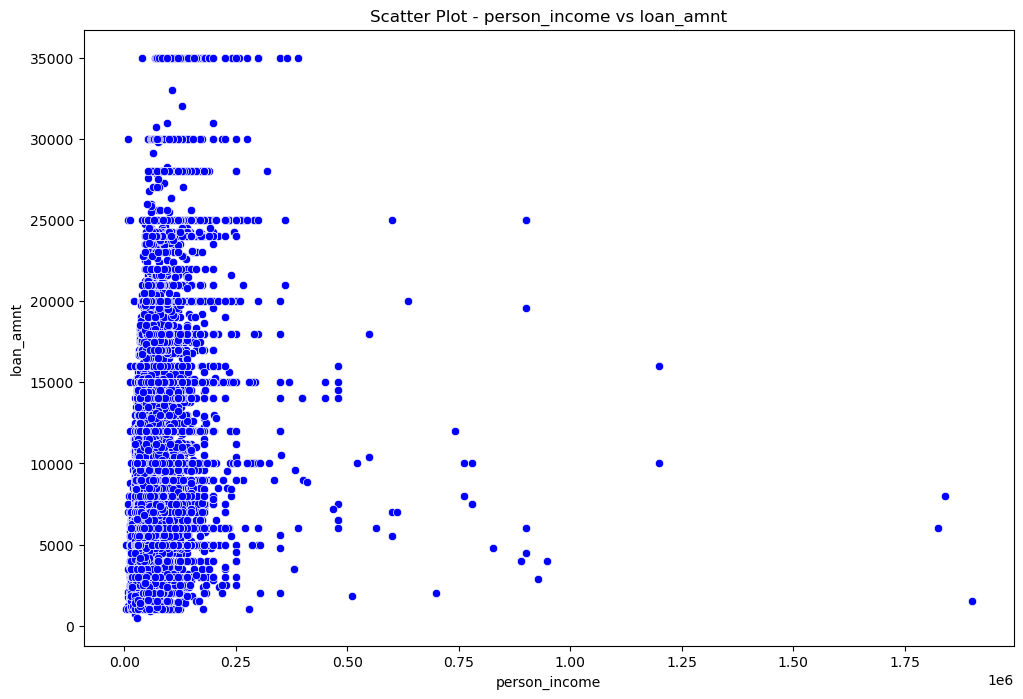

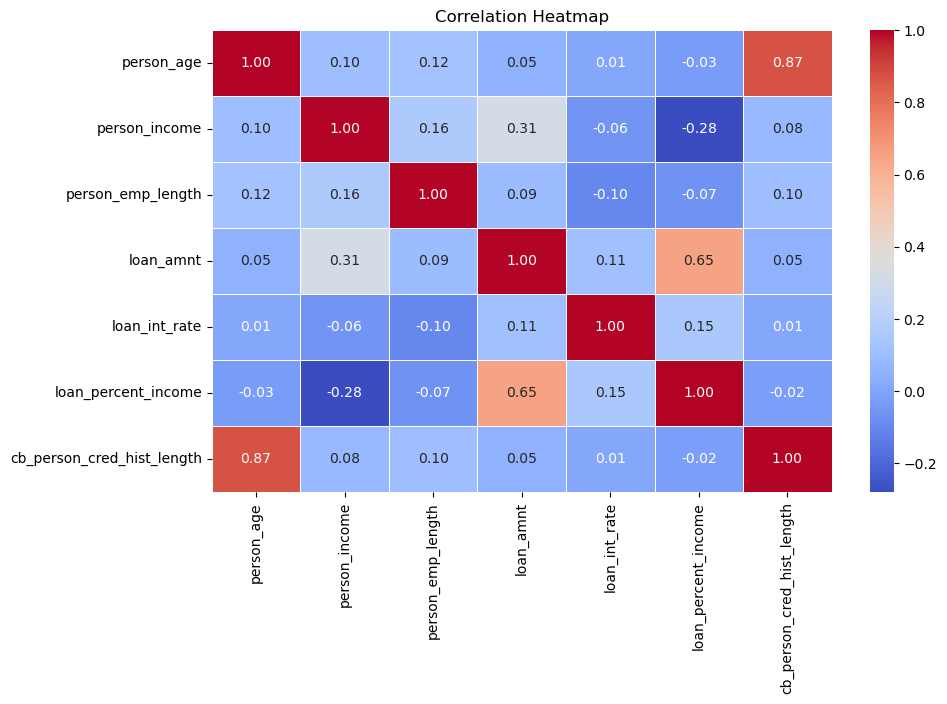

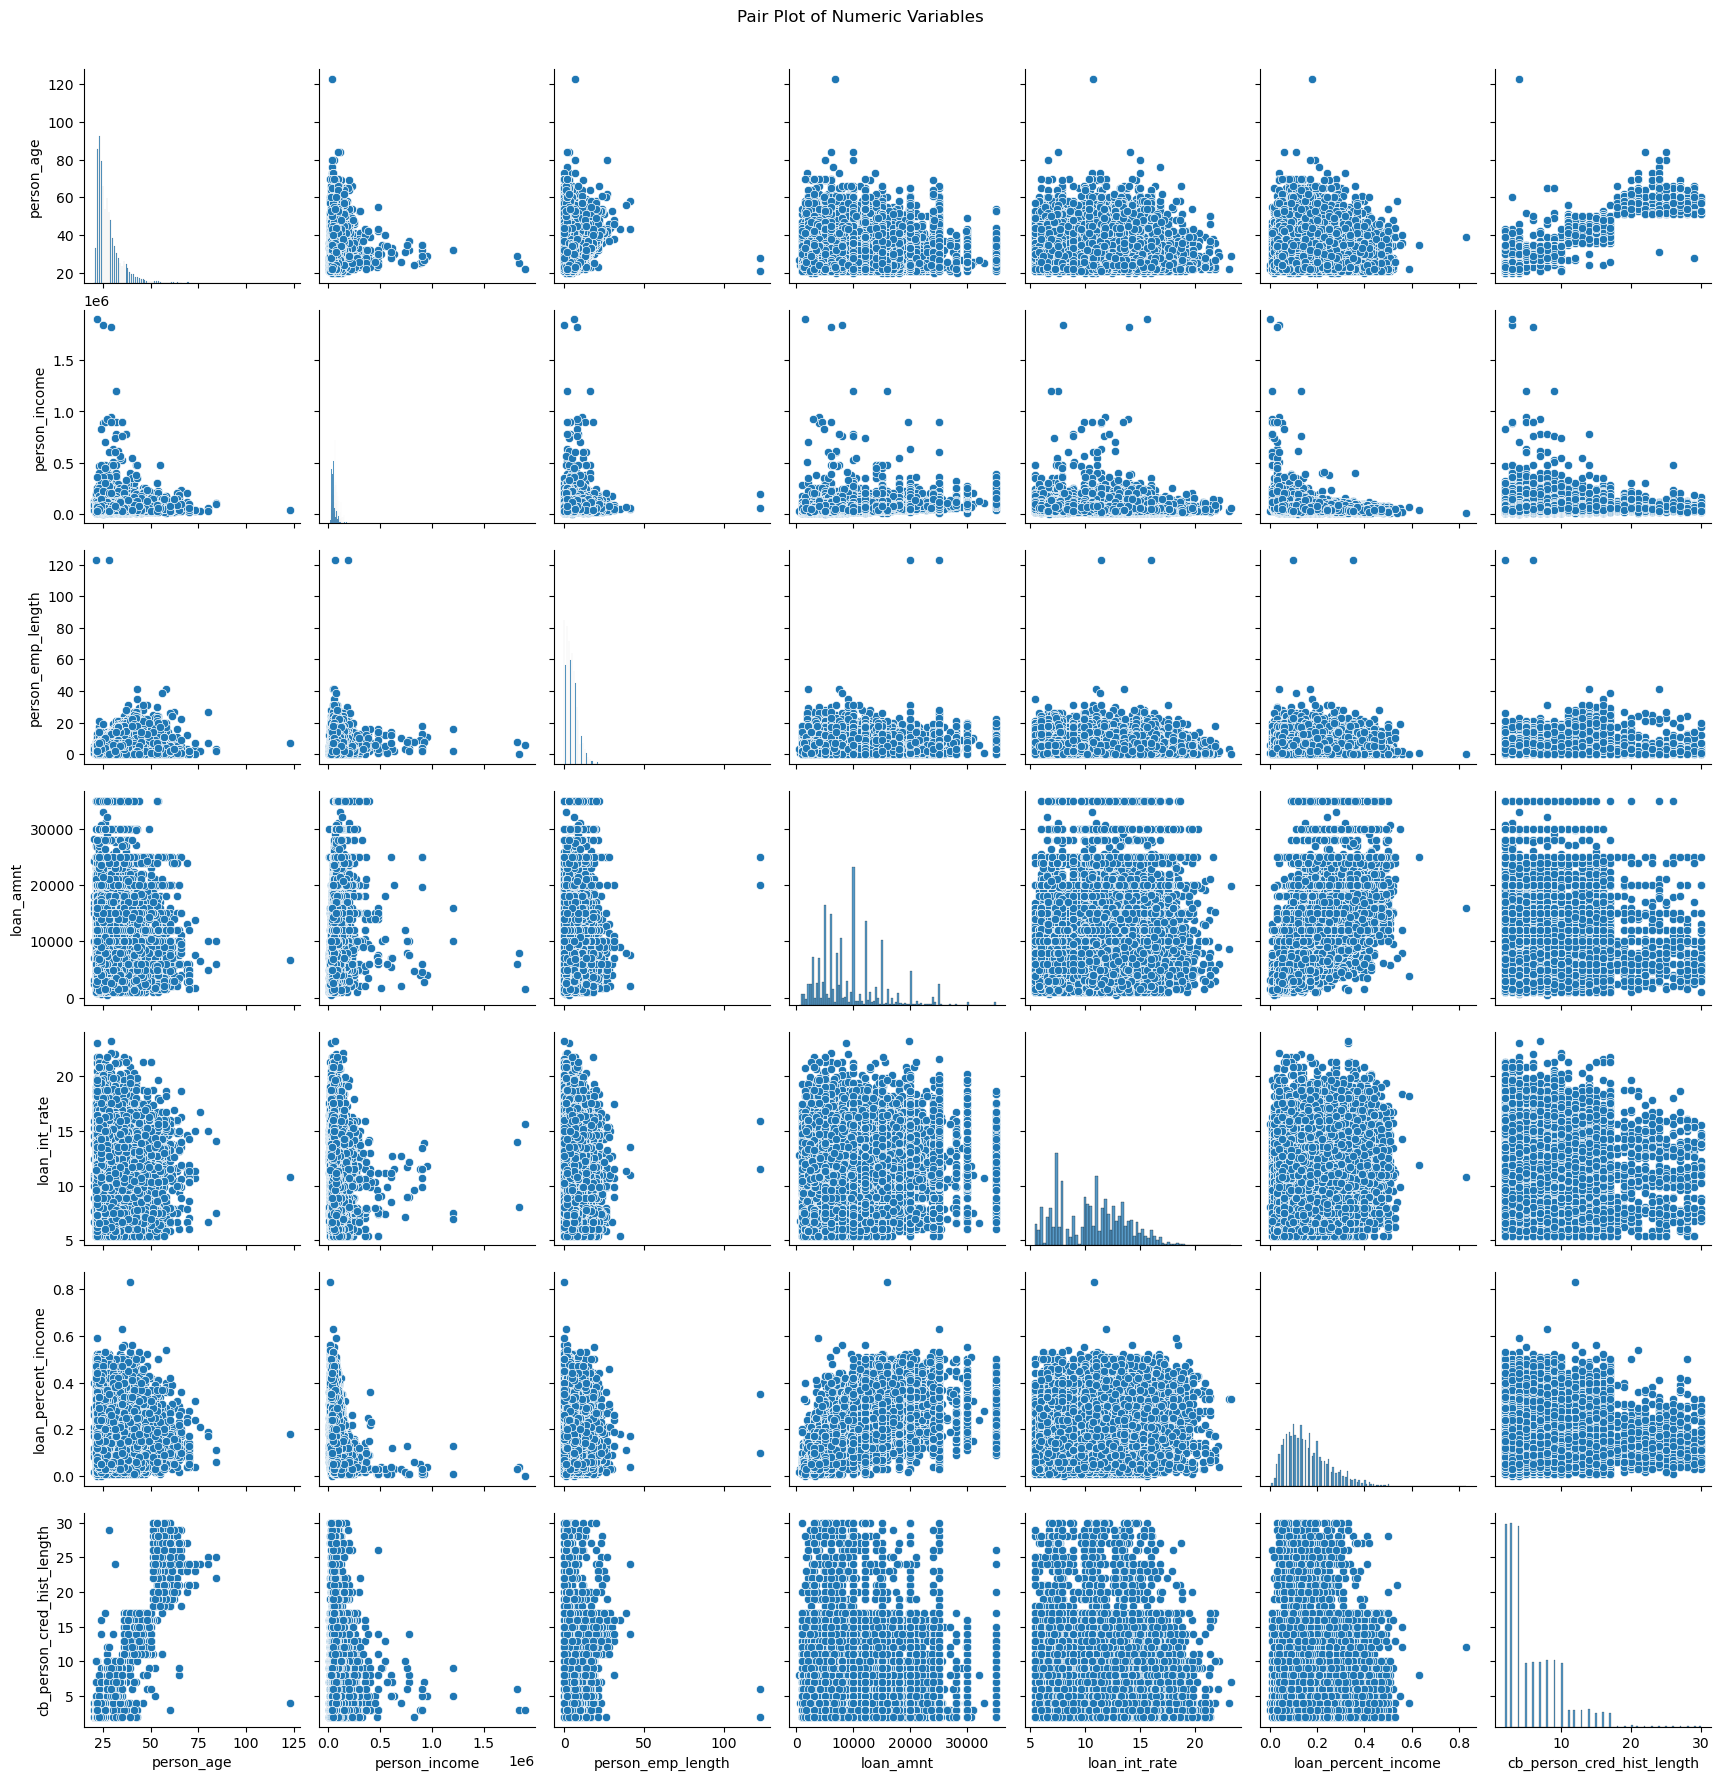

In [62]:
# Scatter Plots
plt.figure(figsize=(12, 8))
sns.scatterplot(x='person_income', y='loan_amnt', data=df, color='blue')
plt.title('Scatter Plot - person_income vs loan_amnt')
plt.show()

# Correlation Heatmap
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(df[numeric_columns], height=2.5)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

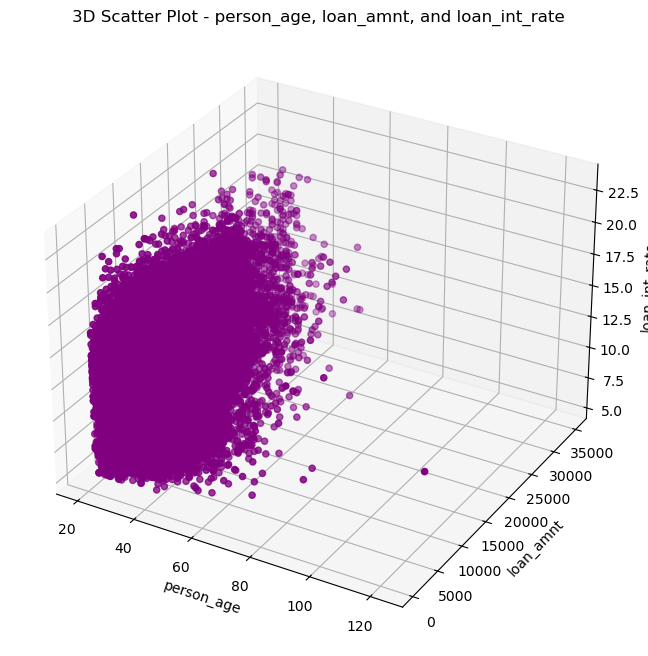

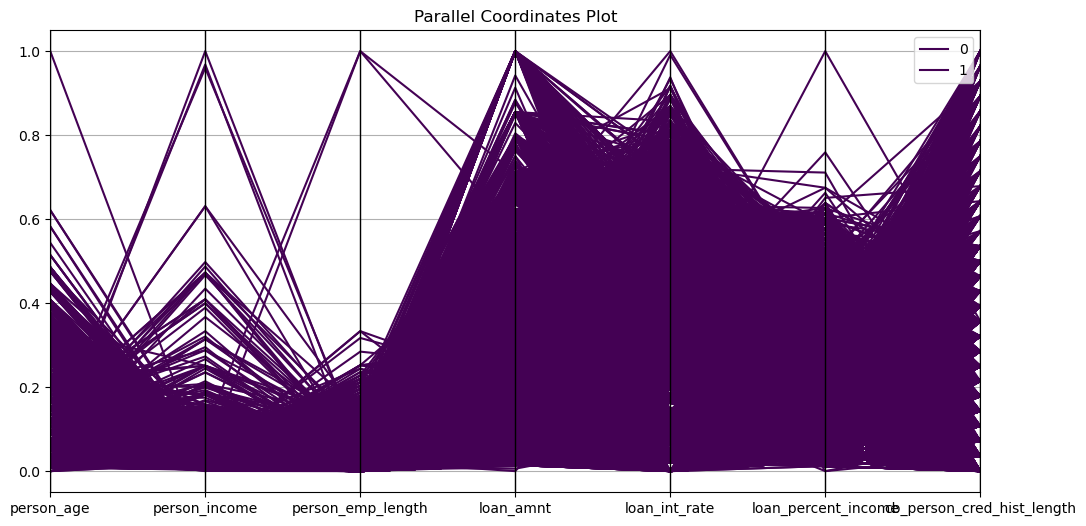

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Multivariate Analysis: 3D Plot

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['person_age'], df['loan_amnt'], df['loan_int_rate'], c='purple', marker='o')
ax.set_xlabel('person_age')
ax.set_ylabel('loan_amnt')
ax.set_zlabel('loan_int_rate')
plt.title('3D Scatter Plot - person_age, loan_amnt, and loan_int_rate')
plt.show()

# Parallel Coordinate Plot (requires normalization)
from pandas.plotting import parallel_coordinates

# Normalizing data for parallel coordinates plot
df_normalized = df[numeric_columns].copy()
df_normalized = (df_normalized - df_normalized.min()) / (df_normalized.max() - df_normalized.min())

# Adding a target column for the color differentiation (using loan_status as an example)
df_normalized['loan_status'] = df['loan_status']

# Plotting the parallel coordinate plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df_normalized, 'loan_status', color=plt.cm.viridis(df_normalized['loan_status']/df_normalized['loan_status'].max()))
plt.title('Parallel Coordinates Plot')
plt.show()


transforming the test data

loading the test data and exploring 

In [76]:
import pandas as pd

# Load the test data
test_data = pd.read_csv('C:\\Users\\HP\\Downloads\\test.csv')

# Display the head of the test data
print(test_data.head())


      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                         

converting the test data into the form of training data for predictions

In [86]:
import pandas as pd

# Load the test data
test_data = pd.read_csv('C:\\Users\\HP\\Downloads\\test.csv')

# Drop the 'person_home_ownership' column
test_data = test_data.drop(columns=['person_home_ownership','loan_intent','id'],)

# Label encoding for required columns
home_ownership_weights = {'Own': 1, 'Mortgage': 2, 'Rent': 3}
loan_grade_weights = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}

test_data['loan_grade'] = test_data['loan_grade'].map(loan_grade_weights)

# Convert 'cb_person_default_on_file' from strings to numeric
default_on_file_weights = {'N': 1, 'Y': 2}
test_data['cb_person_default_on_file'] = test_data['cb_person_default_on_file'].map(default_on_file_weights)

# Save the updated test data to the environment
test_data.to_pickle('testdata.pkl')

# Optionally, save it as a CSV
test_data.to_csv('updatedtestdata.csv', index=False)

# Display the head of the updated test data
print(test_data.head())


   person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
0          23          69000                3.0         5.0      25000   
1          26          96000                6.0         2.0      10000   
2          26          30000                5.0         4.0       4000   
3          33          50000                4.0         0.0       7000   
4          26         102000                8.0         3.0      15000   

   loan_int_rate  loan_percent_income  cb_person_default_on_file  \
0          15.76                 0.36                          1   
1          12.68                 0.10                          2   
2          17.19                 0.13                          2   
3           8.90                 0.14                          1   
4          16.32                 0.15                          2   

   cb_person_cred_hist_length  
0                           2  
1                           4  
2                           2  
3                 

In [94]:
import pandas as pd

columns_to_drop = ['person_id', 'loan_id']  # Add more columns if necessary
secondupdate = secondupdate.drop(columns=columns_to_drop)

# Print the head of the updated DataFrame
print(secondupdate.head())


   person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
0          37          35000                  0           0       6000   
1          22          56000                  6           0       4000   
2          29          28800                  8           0       6000   
3          30          70000                 14           0      12000   
4          22          60000                  2           0       6000   

   loan_int_rate  loan_percent_income  cb_person_default_on_file  \
0          11.49                 0.17                          0   
1          13.35                 0.07                          0   
2           8.90                 0.21                          0   
3          11.11                 0.17                          0   
4           6.92                 0.10                          0   

   cb_person_cred_hist_length  loan_status  
0                          14            0  
1                           2            0  
2          

importing dagshub for logging ml model details

In [100]:
pip install mlflow dagshub

Note: you may need to restart the kernel to use updated packages.


In [ ]:
initiating the repository

In [103]:
import mlflow
import dagshub

# Initialize DagsHub
dagshub.init(repo_owner='nithinyanna3', repo_name='my-first-repo', mlflow=True)



Accessing as nithinyanna3

Initialized MLflow to track repo "nithinyanna3/my-first-repo"

Repository nithinyanna3/my-first-repo initialized!

performing logistic regression with pipeline and data transforming

Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}
F1 Score (CV): 0.4728985183873246
Standard Deviation of F1 Score (CV): 0.019636412673607086
Accuracy on Test Set: 0.8857216672407854
F1 Score on Test Set: 0.4736215787385958
Confusion Matrix (TN, FP, FN, TP): 9688 278 1049 597
Predictions for the first 5 rows of test_data: [1 0 1 0 0]


2024/12/17 14:20:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experiment successfully logged to MLflow!


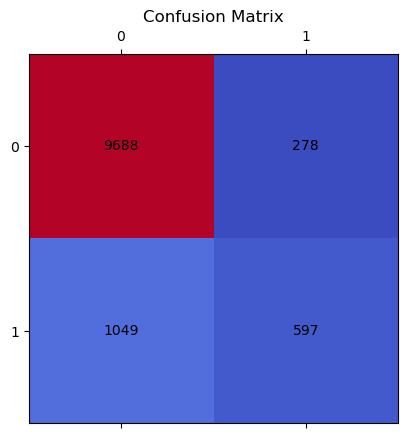

In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import joblib
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Assuming secondupdate and test_data are already loaded DataFrames
# Training data
df = secondupdate.copy()  # Use the `secondupdate` DataFrame
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Testing data
test_features = test_data.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing steps
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Standardize numerical data
    ("minmax", MinMaxScaler())     # Normalize between 0 and 1
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding for categorical data
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Full pipeline with logistic regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="liblinear", random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "classifier__penalty": ["l1", "l2"]        # L1/L2 regularization
}

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search for best parameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and results
best_model = grid_search.best_estimator_
cv_results = grid_search.cv_results_
mean_f1 = grid_search.best_score_
std_f1 = cv_results["std_test_score"][grid_search.best_index_]

# Predictions and metrics on the test set
y_pred = best_model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Best Parameters:", grid_search.best_params_)
print("F1 Score (CV):", mean_f1)
print("Standard Deviation of F1 Score (CV):", std_f1)
print("Accuracy on Test Set:", accuracy)
print("F1 Score on Test Set:", f1)
print("Confusion Matrix (TN, FP, FN, TP):", tn, fp, fn, tp)

# Testing on first 5 rows of test_data
test_predictions = best_model.predict(test_features.head(5))
print("Predictions for the first 5 rows of test_data:", test_predictions)

# Save the model using joblib
joblib.dump(best_model, "logistic_regression_model.pkl")

# Log experiment in MLflow
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("best_C", grid_search.best_params_["classifier__C"])
    mlflow.log_param("best_penalty", grid_search.best_params_["classifier__penalty"])
    mlflow.log_param("cv_splits", 10)
    
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("mean_cv_f1", mean_f1)
    mlflow.log_metric("std_cv_f1", std_f1)
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    
    # Log model
    mlflow.sklearn.log_model(best_model, "logistic_regression_model")
    
    # Save and log confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    ax.matshow(cm, cmap="coolwarm")
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha="center", va="center")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    print("Experiment successfully logged to MLflow!")


performing ridge classifier with pipeline and data transforming

Predictions for the first 5 rows of test_data: [0 0 0 0 0]


2024/12/17 13:22:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.880985187736824
F1 Score (Weighted): 0.8508153925100107
Mean F1 Score (CV): 0.8808867768311529
Std F1 Score (CV): 1.6995211594251085e-05
Confusion Matrix:
[[9868   98]
 [1284  362]]
True Positives (TP): 362
False Negatives (FN): 1284
False Positives (FP): 98
True Negatives (TN): 9868
Experiment successfully logged to MLflow!
🏃 View run mysterious-goat-182 at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/ab78a0a385734998a0e00c5c5ba607f1
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0


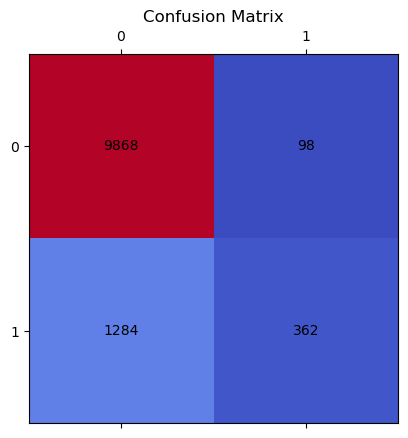

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

# Assuming `secondupdate` and `test_data` DataFrames are already loaded
# Training data
df = secondupdate.copy()  # Use the `secondupdate` DataFrame
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Testing data
test_features = test_data.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing steps
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())  # Standardize numerical data
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding for categorical data
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define the Ridge Classifier model
model = RidgeClassifier()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'classifier__alpha': [0.1, 1, 10],  # Regularization strength
    'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']  # Solvers for Ridge
}

# Full pipeline with model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search for best parameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mean_f1 = np.mean(grid_search.cv_results_["mean_test_score"])
std_f1 = np.std(grid_search.cv_results_["std_test_score"])

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Test first 5 rows of `test_data`
test_predictions = best_model.predict(test_features.head(5))
print("Predictions for the first 5 rows of test_data:", test_predictions)

# Save the model using joblib
joblib.dump(best_model, "ridge_classifier_model.pkl")

# Start MLflow Run
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("best_alpha", grid_search.best_params_["classifier__alpha"])
    mlflow.log_param("best_solver", grid_search.best_params_["classifier__solver"])
    mlflow.log_param("cv_splits", 10)
    
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("mean_cv_f1", mean_f1)
    mlflow.log_metric("std_cv_f1", std_f1)
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    
    # Log model
    mlflow.sklearn.log_model(best_model, "ridge_classifier_model")
    
    # Save and log confusion matrix
    fig, ax = plt.subplots()
    ax.matshow(cm, cmap="coolwarm")
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha="center", va="center")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Print metrics to notebook
    print("Accuracy:", accuracy)
    print("F1 Score (Weighted):", f1)
    print("Mean F1 Score (CV):", mean_f1)
    print("Std F1 Score (CV):", std_f1)
    print("Confusion Matrix:")
    print(cm)
    print("True Positives (TP):", tp)
    print("False Negatives (FN):", fn)
    print("False Positives (FP):", fp)
    print("True Negatives (TN):", tn)
    
    print("Experiment successfully logged to MLflow!")


performing XGBClassifier with pipeline and data transforming

Starting GridSearchCV...
Fitting 10 folds for each of 108 candidates, totalling 1080 fits


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



GridSearchCV completed in 161.41 seconds.

Predictions for the first 5 rows of test_data: [1 0 1 0 0]
Model saved as 'xgb_classifier_model.pkl'.


2024/12/17 13:31:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Metrics:
Accuracy: 0.9173269032035825
F1 Score (Weighted): 0.9139787570137752
Mean F1 Score (CV): 0.906618580447282
Std F1 Score (CV): 0.0016429811984086614
Confusion Matrix:
[[9629  337]
 [ 623 1023]]
True Positives (TP): 1023
False Negatives (FN): 623
False Positives (FP): 337
True Negatives (TN): 9629
Experiment successfully logged to MLflow!
🏃 View run marvelous-crab-821 at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/07275b51f40a43719b58c994bef13fd2
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0


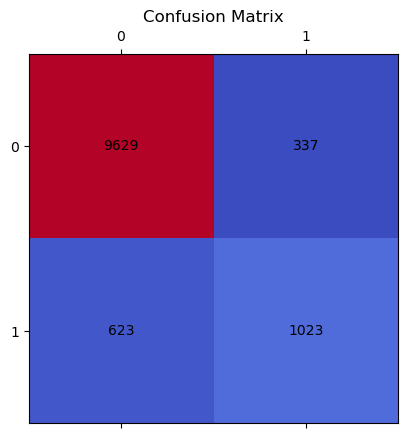

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import joblib

# Assuming `secondupdate` and `test_data` DataFrames are already loaded
# Training data
df = secondupdate.copy()  # Use the `secondupdate` DataFrame
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Testing data
test_features = test_data.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing steps
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())  # Standardize numerical data
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding for categorical data
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define the XGB Classifier model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [3, 6, 10],  # Maximum depth of the tree
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'classifier__subsample': [0.8, 1.0],  # Fraction of samples used for fitting
    'classifier__colsample_bytree': [0.8, 1.0]  # Fraction of features used for each tree
}

# Full pipeline with model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search for best parameters
import time

# Timer starts
start_time = time.time()

print("Starting GridSearchCV...")
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2  # Verbosity level to show progress
)

grid_search.fit(X_train, y_train)

# Timer ends
end_time = time.time()
execution_time = end_time - start_time

print(f"\nGridSearchCV completed in {execution_time:.2f} seconds.")

# Best model and parameters
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mean_f1 = np.mean(grid_search.cv_results_["mean_test_score"])
std_f1 = np.std(grid_search.cv_results_["std_test_score"])

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Test first 5 rows of `test_data`
test_predictions = best_model.predict(test_features.head(5))
print("\nPredictions for the first 5 rows of test_data:", test_predictions)

# Save the model using joblib
joblib.dump(best_model, "xgb_classifier_model.pkl")
print("Model saved as 'xgb_classifier_model.pkl'.")

# Start MLflow Run
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("best_n_estimators", grid_search.best_params_["classifier__n_estimators"])
    mlflow.log_param("best_max_depth", grid_search.best_params_["classifier__max_depth"])
    mlflow.log_param("best_learning_rate", grid_search.best_params_["classifier__learning_rate"])
    mlflow.log_param("best_subsample", grid_search.best_params_["classifier__subsample"])
    mlflow.log_param("best_colsample_bytree", grid_search.best_params_["classifier__colsample_bytree"])
    mlflow.log_param("cv_splits", 10)
    
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("mean_cv_f1", mean_f1)
    mlflow.log_metric("std_cv_f1", std_f1)
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    
    # Log model
    mlflow.sklearn.log_model(best_model, "xgb_classifier_model")
    
    # Save and log confusion matrix
    fig, ax = plt.subplots()
    ax.matshow(cm, cmap="coolwarm")
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha="center", va="center")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Print metrics to notebook
    print("\nMetrics:")
    print("Accuracy:", accuracy)
    print("F1 Score (Weighted):", f1)
    print("Mean F1 Score (CV):", mean_f1)
    print("Std F1 Score (CV):", std_f1)
    print("Confusion Matrix:")
    print(cm)
    print("True Positives (TP):", tp)
    print("False Negatives (FN):", fn)
    print("False Positives (FP):", fp)
    print("True Negatives (TN):", tn)
    
    print("Experiment successfully logged to MLflow!")


performing Random forest with pipeline and data transforming

Starting GridSearchCV...
Fitting 10 folds for each of 81 candidates, totalling 810 fits

Predictions for the first 5 rows of test_data: [1 0 1 0 0]
Model saved as 'random_forest_classifier_model.pkl'.


2024/12/17 13:49:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Metrics:
Accuracy: 0.9099207716155701
F1 Score (Weighted): 0.9056951580786216
Mean F1 Score (CV): 0.9126145944244894
Std F1 Score (CV): 0.0003477845852202995
Confusion Matrix:
[[9606  360]
 [ 686  960]]
True Positives (TP): 960
False Negatives (FN): 686
False Positives (FP): 360
True Negatives (TN): 9606
Experiment successfully logged to MLflow!
🏃 View run flawless-midge-434 at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/e68d2fa0504f4a009868e8353f4dd6d7
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0


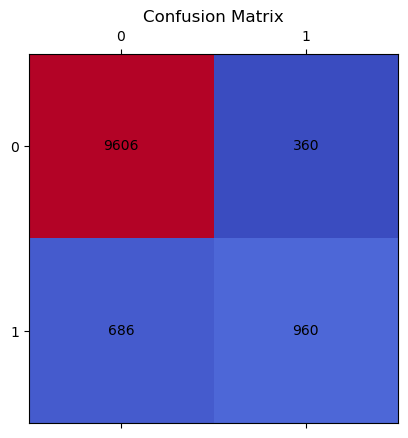

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import joblib

# Assuming `secondupdate` and `test_data` DataFrames are already loaded
# Training data
df = secondupdate.copy()  # Use the `secondupdate` DataFrame
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Testing data
test_features = test_data.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing steps
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())  # Standardize numerical data
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding for categorical data
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Full pipeline with model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search for best parameters
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mean_f1 = np.mean(grid_search.cv_results_["mean_test_score"])
std_f1 = np.std(grid_search.cv_results_["std_test_score"])

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Test first 5 rows of `test_data`
test_predictions = best_model.predict(test_features.head(5))
print("\nPredictions for the first 5 rows of test_data:", test_predictions)

# Save the model using joblib
joblib.dump(best_model, "random_forest_classifier_model.pkl")
print("Model saved as 'random_forest_classifier_model.pkl'.")

# Start MLflow Run
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("best_n_estimators", grid_search.best_params_["classifier__n_estimators"])
    mlflow.log_param("best_max_depth", grid_search.best_params_["classifier__max_depth"])
    mlflow.log_param("best_min_samples_split", grid_search.best_params_["classifier__min_samples_split"])
    mlflow.log_param("best_min_samples_leaf", grid_search.best_params_["classifier__min_samples_leaf"])
    mlflow.log_param("cv_splits", 10)
    
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("mean_cv_f1", mean_f1)
    mlflow.log_metric("std_cv_f1", std_f1)
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    
    # Log model
    mlflow.sklearn.log_model(best_model, "random_forest_classifier_model")
    
    # Save and log confusion matrix
    fig, ax = plt.subplots()
    ax.matshow(cm, cmap="coolwarm")
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha="center", va="center")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Print metrics to notebook
    print("\nMetrics:")
    print("Accuracy:", accuracy)
    print("F1 Score (Weighted):", f1)
    print("Mean F1 Score (CV):", mean_f1)
    print("Std F1 Score (CV):", std_f1)
    print("Confusion Matrix:")
    print(cm)
    print("True Positives (TP):", tp)
    print("False Negatives (FN):", fn)
    print("False Positives (FP):", fp)
    print("True Negatives (TN):", tn)
    
    print("Experiment successfully logged to MLflow!")


In [151]:
import mlflow
import dagshub

# Initialize DagsHub
dagshub.init(repo_owner='nithinyanna3', repo_name='my-first-repo', mlflow=True)


Initialized MLflow to track repo "nithinyanna3/my-first-repo"

Repository nithinyanna3/my-first-repo initialized!

applying column transformations and performing all the 4 models and logging into dagshub

Processing training data...
Training data processed. Shape: (58058, 16)
Processing test data...
Test data processed. Shape: (39098, 15)

Training LogisticRegression...
Model: LogisticRegression
Accuracy: 0.8880
F1 Score: 0.8731
Confusion Matrix:
[[9697  269]
 [1032  614]]
True Positives (TP): 9697
True Negatives (TN): 614
False Positives (FP): 1032
False Negatives (FN): 269


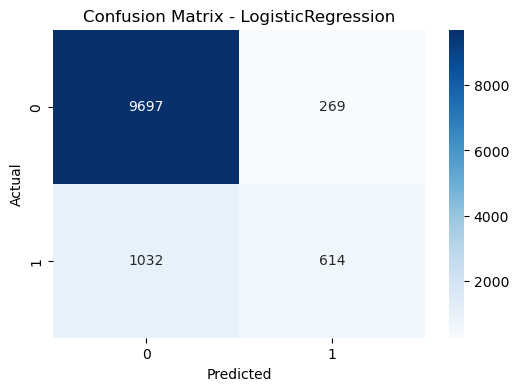

Model saved as LogisticRegression_pipeline.joblib


2024/12/17 14:29:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Predictions on first 5 rows of test_data_fe using LogisticRegression:
[1 0 1 0 0]
🏃 View run LogisticRegression_FeatureEngineering at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/8b49ef5c002744b4b5664f42119eddf3
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

Training RidgeClassifier...
Model: RidgeClassifier
Accuracy: 0.8826
F1 Score: 0.8563
Confusion Matrix:
[[9834  132]
 [1231  415]]
True Positives (TP): 9834
True Negatives (TN): 415
False Positives (FP): 1231
False Negatives (FN): 132


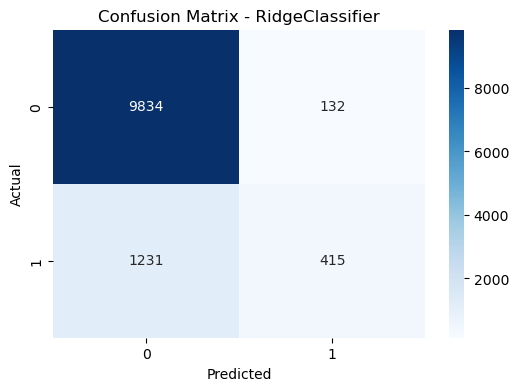

Model saved as RidgeClassifier_pipeline.joblib


2024/12/17 14:29:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Predictions on first 5 rows of test_data_fe using RidgeClassifier:
[1 0 0 0 0]
🏃 View run RidgeClassifier_FeatureEngineering at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/a065305fdb5d44968434ebe6c4e56f9d
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

Training RandomForestClassifier...
Model: RandomForestClassifier
Accuracy: 0.9114
F1 Score: 0.9073
Confusion Matrix:
[[9613  353]
 [ 676  970]]
True Positives (TP): 9613
True Negatives (TN): 970
False Positives (FP): 676
False Negatives (FN): 353


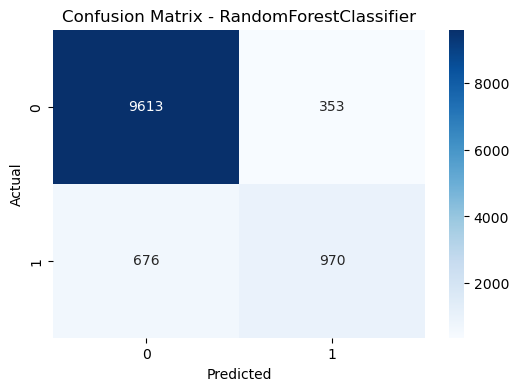

Model saved as RandomForestClassifier_pipeline.joblib


2024/12/17 14:30:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Predictions on first 5 rows of test_data_fe using RandomForestClassifier:
[1 0 1 0 0]
🏃 View run RandomF-Fe at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/3b554e23bfd540e0a3a90200bf75c977
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

Training XGBClassifier...


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBClassifier
Accuracy: 0.9179
F1 Score: 0.9150
Confusion Matrix:
[[9618  348]
 [ 605 1041]]
True Positives (TP): 9618
True Negatives (TN): 1041
False Positives (FP): 605
False Negatives (FN): 348


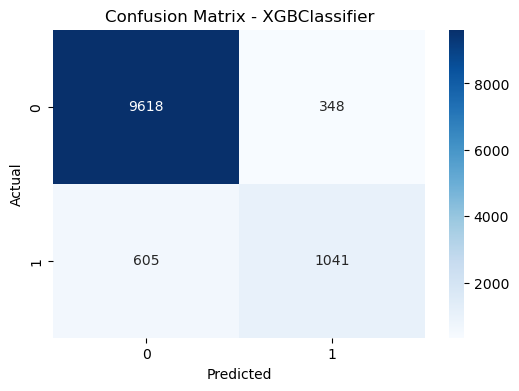

Model saved as XGBClassifier_pipeline.joblib


2024/12/17 14:30:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Predictions on first 5 rows of test_data_fe using XGBClassifier:
[1 0 1 0 0]
🏃 View run XGBClassifier_FeatureEngineering at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/f7171e6b1e654dd3b58dcd1aedbd806a
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

All models have been trained, logged, and saved successfully.


In [184]:
import numpy as np
import pandas as pd
import tempfile
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering Function
def feature_engineering(df):
    df = df.copy()
    
    # Derived features
    df['loan_to_income_ratio'] = df['loan_amnt'] / (df['person_income'] + 1e-5)
    df['income_to_age_ratio'] = df['person_income'] / (df['person_age'] + 1e-5)
    df['credit_age_ratio'] = df['cb_person_cred_hist_length'] / (df['person_age'] + 1e-5)
    df['high_loan'] = (df['loan_amnt'] > 10000).astype(int)
    df['log_loan_amnt'] = np.log1p(df['loan_amnt'])
    df['log_income'] = np.log1p(df['person_income'])
    
    # Return modified DataFrame and list of new features
    new_features = [
        'loan_to_income_ratio', 'income_to_age_ratio', 'credit_age_ratio',
        'high_loan', 'log_loan_amnt', 'log_income'
    ]
    return df, new_features

# Process the training data (secondupdate)
print("Processing training data...")
thirdupdate, new_features = feature_engineering(secondupdate)
print("Training data processed. Shape:", thirdupdate.shape)

# Process the testing data (test_data)
print("Processing test data...")
test_data_fe, _ = feature_engineering(test_data)
print("Test data processed. Shape:", test_data_fe.shape)

# Save feature-engineered datasets (optional)
thirdupdate.to_csv("thirdupdate.csv", index=False)
test_data_fe.to_csv("test_data_fe.csv", index=False)

# Prepare training and target variables
X = thirdupdate.drop("loan_status", axis=1)  # Independent variables
y = thirdupdate["loan_status"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns

# Preprocessing Pipelines
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Set the MLflow tracking URI and experiment name
mlflow.set_tracking_uri("https://dagshub.com/nithinyanna3/my-first-repo.mlflow")  # Change path if needed
mlflow.set_experiment("Default")  # Set experiment name

# Train and Log Models
for model_name, model in models.items():
    with mlflow.start_run(run_name=f"{model_name}_FeatureEngineering"):
        print(f"\nTraining {model_name}...")
        
        # Full pipeline
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Predict
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        
        # Print metrics
        print(f"Model: {model_name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        
        # Extract confusion matrix values
        tp, fn, fp, tn = cm.ravel()
        
        # Print confusion matrix values
        print(f"True Positives (TP): {tp}")
        print(f"True Negatives (TN): {tn}")
        print(f"False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}")
        
        # Visualize confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        
        # Save the model using joblib
        model_filename = f"{model_name}_pipeline.joblib"
        joblib.dump(pipeline, model_filename)
        print(f"Model saved as {model_filename}")
        
        # Log metrics and model to MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)
        mlflow.sklearn.log_model(pipeline, f"{model_name}_model")
        
        # Predict for the first 5 rows of test data
        print(f"\nPredictions on first 5 rows of test_data_fe using {model_name}:")
        predictions = pipeline.predict(test_data_fe.head(5))
        print(predictions)

print("\nAll models have been trained, logged, and saved successfully.")




applying variance threshold for the dataset and refining the dataset

In [196]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Assuming dfsecondupdate is already loaded in the environment
# dfsecondupdate = pd.read_csv("path_to_your_dfsecondupdate.csv")  # Uncomment and modify path as needed

# Create a copy of dfsecondupdate
df = secondupdate.copy()

# Separate target variable
X = df.drop("loan_status", axis=1)  # Features (excluding target)
y = df["loan_status"]  # Target variable

# Step 1: Apply Variance Threshold to remove low variance features
variance_threshold = VarianceThreshold(threshold=0.01)  # You can adjust the threshold as needed

# Apply VarianceThreshold to the features (X)
X_var = variance_threshold.fit_transform(X)

# Step 2: Identify the columns that were removed
removed_columns = X.columns[~variance_threshold.get_support()]

# Step 3: Convert the resulting array back to a DataFrame
X_var_df = pd.DataFrame(X_var, columns=X.columns[variance_threshold.get_support()])

# Add the target variable back to the DataFrame
X_var_df["loan_status"] = y

# Step 4: Save the dataset with low-variance features removed
output_path = "fourthupdate.csv"  # Save in the environment
X_var_df.to_csv(output_path, index=False)

# Print details
print(f"Low-variance features removed: {', '.join(removed_columns)}")
print(f"Original dataset size: {X.shape}")
print(f"New dataset size after removing low-variance features: {X_var_df.shape}")

# Print the columns in secondupdate and fourthupdate to see the difference
print(f"Columns in secondupdate: {X.columns.tolist()}")
print(f"Columns in fourthupdate: {X_var_df.columns.tolist()}")


Low-variance features removed: loan_grade, loan_percent_income, cb_person_default_on_file
Original dataset size: (58058, 9)
New dataset size after removing low-variance features: (58058, 7)
Columns in secondupdate: ['person_age', 'person_income', 'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
Columns in fourthupdate: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'loan_status']


knowing the highly correlated variables

Correlation Matrix:
                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.115944           0.116679   
person_income                 0.115944       1.000000           0.199807   
person_emp_length             0.116679       0.199807           1.000000   
loan_amnt                     0.047632       0.378064           0.092139   
loan_int_rate                 0.005217      -0.074235          -0.108780   
cb_person_cred_hist_length    0.871600       0.095027           0.101096   

                            loan_amnt  loan_int_rate  \
person_age                   0.047632       0.005217   
person_income                0.378064      -0.074235   
person_emp_length            0.092139      -0.108780   
loan_amnt                    1.000000       0.113635   
loan_int_rate                0.113635       1.000000   
cb_person_cred_hist_length   0.041843       0.003802   

                            cb_person_cred_hist_length

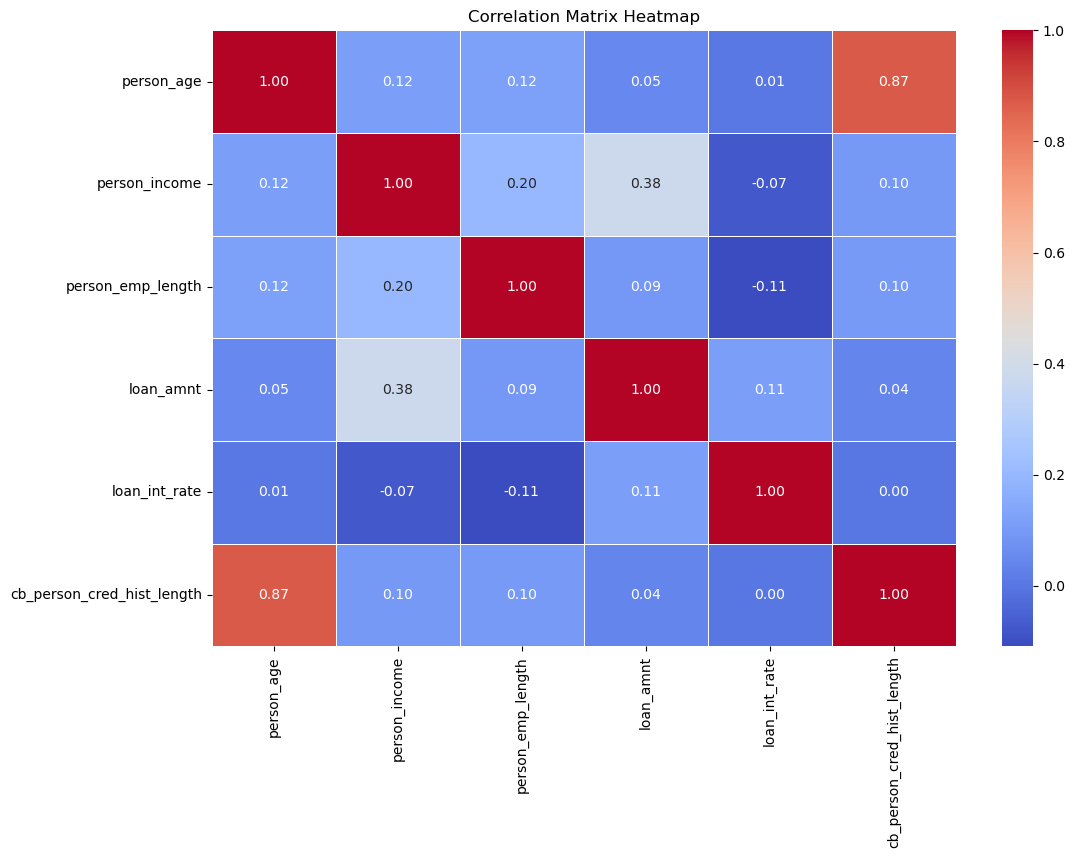

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset after applying Variance Threshold
df_variance_threshold = pd.read_csv("fourthupdate.csv")

# Separate target variable
X_var = df_variance_threshold.drop("loan_status", axis=1)  # Features (excluding target)
y = df_variance_threshold["loan_status"]  # Target variable

# Calculate the correlation matrix for the features (X_var)
correlation_matrix = X_var.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract high correlated variables with a threshold, e.g., |correlation| > 0.7
correlation_threshold = 0.7
highly_correlated_vars = correlation_matrix[abs(correlation_matrix) > correlation_threshold].stack()
highly_correlated_vars = highly_correlated_vars[highly_correlated_vars != 1]  # Exclude self-correlation (correlation = 1)

# Print highly correlated variables
print(f"High correlated variables (threshold > {correlation_threshold}):")
print(highly_correlated_vars)

# Plotting the heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()



In [206]:
import pandas as pd

# Assuming the file is saved in the environment as 'updatedtestdata.csv'
file_path = "updatedtestdata.csv"

# Load the dataset
df_updated_test = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df_updated_test.head())


   person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
0          23          69000                3.0         5.0      25000   
1          26          96000                6.0         2.0      10000   
2          26          30000                5.0         4.0       4000   
3          33          50000                4.0         0.0       7000   
4          26         102000                8.0         3.0      15000   

   loan_int_rate  loan_percent_income  cb_person_default_on_file  \
0          15.76                 0.36                          1   
1          12.68                 0.10                          2   
2          17.19                 0.13                          2   
3           8.90                 0.14                          1   
4          16.32                 0.15                          2   

   cb_person_cred_hist_length  
0                           2  
1                           4  
2                           2  
3                 

In [ ]:
updating the test data accordingly 

In [209]:
import pandas as pd

# Assuming the file is saved in the environment as 'updatedtestdata.csv'
file_path = "updatedtestdata.csv"

# Load the dataset
df_updated_test = pd.read_csv(file_path)

# Columns to be removed (replace with your desired columns)
columns_to_remove = ['loan_grade', 'cb_person_default_on_file','loan_percent_income']  # Replace 'column1', 'column2' with actual column names

# Remove specified columns
df_test_variance = df_updated_test.drop(columns=columns_to_remove)

# Save the new dataframe as 'test_variance.csv'
output_path = "test_variance.csv"
df_test_variance.to_csv(output_path, index=False)

# Display the first few rows of the modified dataset
print(df_test_variance.head())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          23          69000                3.0      25000          15.76   
1          26          96000                6.0      10000          12.68   
2          26          30000                5.0       4000          17.19   
3          33          50000                4.0       7000           8.90   
4          26         102000                8.0      15000          16.32   

   cb_person_cred_hist_length  
0                           2  
1                           4  
2                           2  
3                           7  
4                           4  


 deplyomnet along with logging to dagshub


Training LogisticRegression...
Model: LogisticRegression
Accuracy: 0.8582
F1 Score: 0.7927
Confusion Matrix:
[[9865    0]
 [1630    0]]
True Positives (TP): 9865
True Negatives (TN): 0
False Positives (FP): 1630
False Negatives (FN): 0


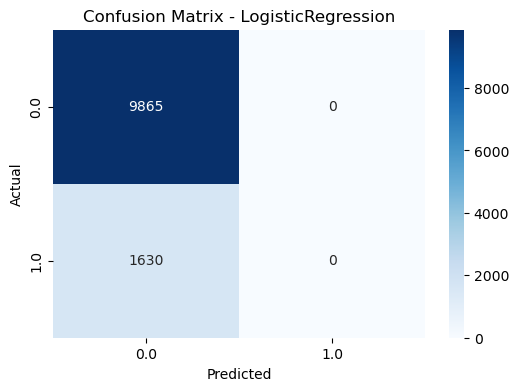

Model saved as LogisticRegression_pipeline.joblib

Predictions on first 5 rows of test_variance using LogisticRegression:
[0. 0. 0. 0. 0.]
🏃 View run LogisticRegression_Variance at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/7adc4544b4e048f9ae6f148345ce147c
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

Training RidgeClassifier...
Model: RidgeClassifier
Accuracy: 0.8582
F1 Score: 0.7927
Confusion Matrix:
[[9865    0]
 [1630    0]]
True Positives (TP): 9865
True Negatives (TN): 0
False Positives (FP): 1630
False Negatives (FN): 0


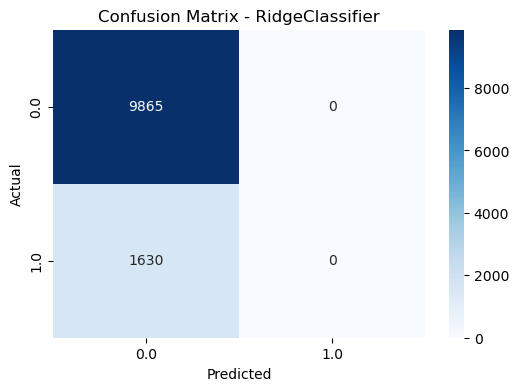

Model saved as RidgeClassifier_pipeline.joblib

Predictions on first 5 rows of test_variance using RidgeClassifier:
[0. 0. 0. 0. 0.]
🏃 View run RidgeClassifier_Variance at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/09fcc6bef97448b190f27e428ce5a0bf
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

Training RandomForestClassifier...
Model: RandomForestClassifier
Accuracy: 0.8554
F1 Score: 0.7923
Confusion Matrix:
[[9827   38]
 [1624    6]]
True Positives (TP): 9827
True Negatives (TN): 6
False Positives (FP): 1624
False Negatives (FN): 38


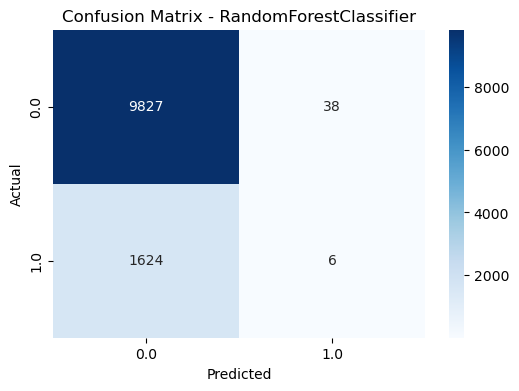

Model saved as RandomForestClassifier_pipeline.joblib

Predictions on first 5 rows of test_variance using RandomForestClassifier:
[0. 0. 0. 0. 0.]
🏃 View run RandomForestClassifier_Variance at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/52644c1f354c4987b26ee160b363833d
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

Training XGBClassifier...
Model: XGBClassifier
Accuracy: 0.8574
F1 Score: 0.7927
Confusion Matrix:
[[9854   11]
 [1628    2]]
True Positives (TP): 9854
True Negatives (TN): 2
False Positives (FP): 1628
False Negatives (FN): 11


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


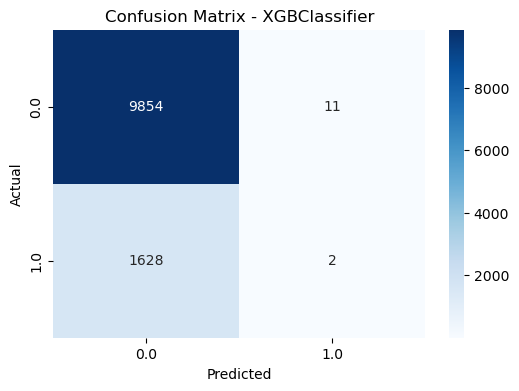

Model saved as XGBClassifier_pipeline.joblib

Predictions on first 5 rows of test_variance using XGBClassifier:
[0 0 0 0 0]
🏃 View run XGBClassifier_Variance at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0/runs/a9122eb3c2a84bda89bdc0b3994da7cc
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/0

All models have been trained, logged, and saved successfully.


In [228]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from fourthupdate.csv
df = pd.read_csv("fourthupdate.csv")

# Separate target variable
X = df.drop("loan_status", axis=1)  # Features (excluding target)
y = df["loan_status"]  # Target variable

# Handling NaN values
X.dropna(inplace=True)
y.dropna(inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns

# Preprocessing Pipelines
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

mlflow.set_tracking_uri("https://dagshub.com/nithinyanna3/my-first-repo.mlflow")  # Change path if needed
mlflow.set_experiment("Default")

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Training and Logging Models
for model_name, model in models.items():
    with mlflow.start_run(run_name=f"{model_name}_Variance"):
        print(f"\nTraining {model_name}...")
        
        # Full pipeline
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Predict
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        
        # Print metrics
        print(f"Model: {model_name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        
        # Extract confusion matrix values
        tp, fn, fp, tn = cm.ravel()
        
        # Print confusion matrix values
        print(f"True Positives (TP): {tp}")
        print(f"True Negatives (TN): {tn}")
        print(f"False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}")
        
        # Visualize confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        
        # Save the model using joblib
        model_filename = f"{model_name}_pipeline.joblib"
        joblib.dump(pipeline, model_filename)
        print(f"Model saved as {model_filename}")
        
        # Log metrics and model to MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)
        
        # Predict for the first 5 rows of test data
        print(f"\nPredictions on first 5 rows of test_variance using {model_name}:")
        test_variance = pd.read_csv("test_variance.csv")
        predictions = pipeline.predict(test_variance.head(5))
        print(predictions)

print("\nAll models have been trained, logged, and saved successfully.")


Use PCA for dimensionality reduction on all the features and testing it on random forest

In [244]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Load dataset
df = secondupdate.copy()

# Separate features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Determine number of components for 95% explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components selected for 95% explained variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

# Save model using joblib
joblib.dump(model, "random_forest_pca_model.joblib")

mlflow.set_tracking_uri("https://dagshub.com/nithinyanna3/my-first-repo.mlflow")  # Change path if needed
mlflow.set_experiment("PCA")

# Log model to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(model, "RandomForest_PCA_Model")

    # Predictions
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Log metrics
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    # Confusion Matrix
    tp, fn, fp, tn = cm.ravel()
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)

    # Print results
    print("Random Forest with PCA Classification Metrics:")
    print(f"Accuracy: {acc}")
    print(f"F1 Score (weighted): {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"True Positive (TP): {tp}, False Negative (FN): {fn}, False Positive (FP): {fp}, True Negative (TN): {tn}")

    # Test with 5 rows from updatedtestdata.csv
    df_test = pd.read_csv("updatedtestdata.csv")
    if "loan_status" in df_test.columns:
        X_test_sample = df_test.iloc[:5]
        y_test_sample = df_test["loan_status"].iloc[:5]
        X_test_sample_scaled = scaler.transform(X_test_sample)
        X_test_sample_pca = pca.transform(X_test_sample_scaled)
        y_test_sample_pred = model.predict(X_test_sample_pca)

        # Print 5 test samples predictions
        for i in range(5):
            print(f"Row {i + 1}: Predicted loan_status = {y_test_sample_pred[i]}, Actual loan_status = {y_test_sample.iloc[i]}")
    else:
        print("The 'loan_status' column is missing in the test dataset.")

print("Model training and logging completed.")


Number of components selected for 95% explained variance: 5


2024/12/17 15:39:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest with PCA Classification Metrics:
Accuracy: 0.8995005167068549
F1 Score (weighted): 0.8908174486589133
Confusion Matrix:
[[9611  299]
 [ 868  834]]
True Positive (TP): 9611, False Negative (FN): 299, False Positive (FP): 868, True Negative (TN): 834
The 'loan_status' column is missing in the test dataset.
🏃 View run charming-bass-298 at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/5/runs/b656d71806fb4f22af40c29e6fb28b13
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/5
Model training and logging completed.


the custom experiment i performed is KNN with PCA and logged into dagshub

In [248]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Load dataset
df = secondupdate.copy()

# Separate features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Determine number of components for 95% explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components selected for 95% explained variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_pca, y_train)

# Save model using joblib
joblib.dump(model, "knn_pca_model.joblib")

mlflow.set_tracking_uri("https://dagshub.com/nithinyanna3/my-first-repo.mlflow")  # Change path if needed
mlflow.set_experiment("PCA")

# Log model to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(model, "KNN_PCA_Model")

    # Predictions
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Log metrics
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    # Confusion Matrix
    tp, fn, fp, tn = cm.ravel()
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)

    # Print results
    print("KNN with PCA Classification Metrics:")
    print(f"Accuracy: {acc}")
    print(f"F1 Score (weighted): {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"True Positive (TP): {tp}, False Negative (FN): {fn}, False Positive (FP): {fp}, True Negative (TN): {tn}")
 # Test with 5 rows from updatedtestdata.csv
    df_test = pd.read_csv("updatedtestdata.csv")
    if "loan_status" in df_test.columns:
        X_test_sample = df_test.iloc[:5]
        y_test_sample = df_test["loan_status"].iloc[:5]
        X_test_sample_scaled = scaler.transform(X_test_sample)
        X_test_sample_pca = pca.transform(X_test_sample_scaled)
        y_test_sample_pred = model.predict(X_test_sample_pca)

        # Print 5 test samples predictions
        for i in range(5):
            print(f"Row {i + 1}: Predicted loan_status = {y_test_sample_pred[i]}, Actual loan_status = {y_test_sample.iloc[i]}")
    else:
        print("The 'loan_status' column is missing in the test dataset.")

print("Model training and logging completed.")

Number of components selected for 95% explained variance: 5


2024/12/17 15:47:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KNN with PCA Classification Metrics:
Accuracy: 0.8944195659662418
F1 Score (weighted): 0.8865163979822601
Confusion Matrix:
[[9550  360]
 [ 866  836]]
True Positive (TP): 9550, False Negative (FN): 360, False Positive (FP): 866, True Negative (TN): 836
The 'loan_status' column is missing in the test dataset.
🏃 View run nosy-fowl-4 at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/5/runs/2ebe3c8c0a914053b6c42cf1b4ccd2ef
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/5
Model training and logging completed.


the second custom experiment i performed is SVM with PCA

In [253]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Load dataset
df = secondupdate.copy()

# Separate features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Determine number of components for 95% explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components selected for 95% explained variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_pca, y_train)

# Save model using joblib
joblib.dump(model, "svm_pca_model.joblib")

mlflow.set_tracking_uri("https://dagshub.com/nithinyanna3/my-first-repo.mlflow")  # Change path if needed
mlflow.set_experiment("PCA")

# Log model to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(model, "SVM_PCA_Model")

    # Predictions
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Log metrics
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    # Confusion Matrix
    tp, fn, fp, tn = cm.ravel()
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)

    # Print results
    print("SVM with PCA Classification Metrics:")
    print(f"Accuracy: {acc}")
    print(f"F1 Score (weighted): {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"True Positive (TP): {tp}, False Negative (FN): {fn}, False Positive (FP): {fp}, True Negative (TN): {tn}")

    # Test with 5 rows from updatedtestdata.csv
    df_test = pd.read_csv("updatedtestdata.csv")
    if "loan_status" in df_test.columns:
        X_test_sample = df_test.iloc[:5]
        y_test_sample = df_test["loan_status"].iloc[:5]
        X_test_sample_scaled = scaler.transform(X_test_sample)
        X_test_sample_pca = pca.transform(X_test_sample_scaled)
        y_test_sample_pred = model.predict(X_test_sample_pca)

        # Print 5 test samples predictions
        for i in range(5):
            print(f"Row {i + 1}: Predicted loan_status = {y_test_sample_pred[i]}, Actual loan_status = {y_test_sample.iloc[i]}")
    else:
        print("The 'loan_status' column is missing in the test dataset.")

print("Model training and logging completed.")


Number of components selected for 95% explained variance: 5


2024/12/17 15:55:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM with PCA Classification Metrics:
Accuracy: 0.8965725111953152
F1 Score (weighted): 0.8827149247633431
Confusion Matrix:
[[9709  201]
 [1000  702]]
True Positive (TP): 9709, False Negative (FN): 201, False Positive (FP): 1000, True Negative (TN): 702
The 'loan_status' column is missing in the test dataset.
🏃 View run PCA with SVM at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/5/runs/5790d03e0dc04550885c47f049ad18f1
🧪 View experiment at: https://dagshub.com/nithinyanna3/my-first-repo.mlflow/#/experiments/5
Model training and logging completed.


Create meaningful F1-score plots and accuracies to compare experiments and determine the best model.

printing outpus from best model with 92% accuracy XGBoost

In [267]:
import pandas as pd
import mlflow
import xgboost as xgb
import joblib

# Load the saved XGBoost model
model = joblib.load("xgb_classifier_model.pkl")

# Load the test dataset
df_test = pd.read_csv("updatedtestdata.csv")

# Predict
y_test_sample_pred = model.predict(df_test)

# Add predictions to the DataFrame
df_test['Predicted loan_status'] = y_test_sample_pred

# Display the test data with predictions
print(df_test)

print("Prediction on test data completed.")


       person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
0              23          69000                3.0         5.0      25000   
1              26          96000                6.0         2.0      10000   
2              26          30000                5.0         4.0       4000   
3              33          50000                4.0         0.0       7000   
4              26         102000                8.0         3.0      15000   
...           ...            ...                ...         ...        ...   
39093          22          31200                2.0         1.0       3000   
39094          22          48000                6.0         0.0       7000   
39095          51          60000                0.0         0.0      15000   
39096          22          36000                4.0         3.0      14000   
39097          31          45000                6.0         1.0      19450   

       loan_int_rate  loan_percent_income  cb_person_default_on

Save the final model using joblib.
Create a FastAPI application to serve the model.
Containerize the FastAPI application using Docker and push to Docker Hub.
Deploy the containerized API to a cloud platform.

Create a Streamlit app to interact with the deployed model for real-time classification.


In [263]:
pip install scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


In [265]:
import joblib
from xgboost import XGBClassifier

# Assuming 'model' is your trained XGBoost model
joblib.dump(model, 'xgb_classifier_model.pkl')


['xgb_classifier_model.pkl']

In [273]:
pip install fastapi uvicorn


Note: you may need to restart the kernel to use updated packages.


local deployment of fastapi

In [4]:
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pandas as pd
import joblib
import nest_asyncio

# Apply nest_asyncio to fix event loop issues in Jupyter
nest_asyncio.apply()

# Load the model
model = joblib.load("best_xgb_model_with_scaler.pkl")

app = FastAPI()

class InputData(BaseModel):
    person_age: float
    person_income: float
    person_emp_length: float
    loan_grade: float
    loan_amnt: float
    loan_int_rate: float
    loan_percent_income: float
    cb_person_default_on_file: float
    cb_person_cred_hist_length: float

@app.post("/predict")
async def predict(data: InputData):
    try:
        input_features = np.array([
            data.person_age,
            data.person_income,
            data.person_emp_length,
            data.loan_grade,
            data.loan_amnt,
            data.loan_int_rate,
            data.loan_percent_income,
            data.cb_person_default_on_file,
            data.cb_person_cred_hist_length,
        ])
        
        # Convert the array to a DataFrame with the appropriate column names
        input_df = pd.DataFrame([input_features], columns=[
            'person_age', 'person_income', 'person_emp_length', 'loan_grade', 
            'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
            'cb_person_default_on_file', 'cb_person_cred_hist_length'
        ])

        # Make prediction
        prediction = model.predict(input_df)
        return {"prediction": int(prediction[0])}
    except Exception as e:
        return {"error": str(e)}

if __name__ == "__main__":
    config = uvicorn.Config(app, host="127.0.0.1", port=8002, log_level="info")
    server = uvicorn.Server(config)
    await server.serve()


INFO:     Started server process [14084]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8002 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [14084]


In [6]:
!pip install docker render-python


working with dockerfile directory

In [3]:
dockerfile_content = """
# Use the official Python image as the base image
FROM python:3.10-slim

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file to the container
COPY requirements.txt .

# Install the required Python libraries
RUN pip install --no-cache-dir -r requirements.txt

# Copy the FastAPI app code to the container
COPY . .

# Expose the application port
EXPOSE 8001

# Command to run the application
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8002"]
"""

with open("Dockerfile", "w") as file:
    file.write(dockerfile_content)


In [5]:
requirements_content = """
fastapi
uvicorn
numpy
pandas
joblib
nest_asyncio
"""

with open("requirements.txt", "w") as file:
    file.write(requirements_content)


In [11]:
import os

os.chdir("C:\\Users\\HP")


In [17]:
mkdir C:\Users\HP\docker_build


In [13]:
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pandas as pd
import joblib
import os

# Define the Python code as a string
python_code = """
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pandas as pd
import joblib

# Load the model
model = joblib.load("best_xgb_model_with_scaler.pkl")

# Initialize the FastAPI app
app = FastAPI()

# Define the input data schema
class InputData(BaseModel):
    person_age: float
    person_income: float
    person_emp_length: float
    loan_grade: float
    loan_amnt: float
    loan_int_rate: float
    loan_percent_income: float
    cb_person_default_on_file: float
    cb_person_cred_hist_length: float

# Prediction endpoint
@app.post("/predict")
async def predict(data: InputData):
    try:
        # Prepare the input features for the model
        input_features = np.array([
            data.person_age,
            data.person_income,
            data.person_emp_length,
            data.loan_grade,
            data.loan_amnt,
            data.loan_int_rate,
            data.loan_percent_income,
            data.cb_person_default_on_file,
            data.cb_person_cred_hist_length,
        ])
        
        # Convert to a DataFrame
        input_df = pd.DataFrame([input_features], columns=[
            'person_age', 'person_income', 'person_emp_length', 'loan_grade', 
            'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
            'cb_person_default_on_file', 'cb_person_cred_hist_length'
        ])

        # Make a prediction
        prediction = model.predict(input_df)
        return {"prediction": int(prediction[0])}
    except Exception as e:
        # Return error details if something goes wrong
        return {"error": str(e)}

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8002, log_level="info")
"""

# Define the target directory
target_dir = r"C:\Users\HP\docker_build"

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Save the script as main.py in the target directory
file_path = os.path.join(target_dir, "main.py")
try:
    with open(file_path, "w") as file:
        file.write(python_code)
    print(f"main.py saved successfully in {target_dir}")
except Exception as e:
    print(f"Error saving main.py: {e}")


main.py saved successfully in C:\Users\HP\docker_build


In [21]:
import os
import shutil

# Create target directory if it doesn't exist
target_dir = r"C:\Users\HP\docker_build"
os.makedirs(target_dir, exist_ok=True)

# Move the Dockerfile
shutil.move(r"C:\Users\HP\Dockerfile", target_dir)

# Move other necessary files (example: requirements.txt)
shutil.move(r"C:\Users\HP\requirements.txt", target_dir)



'C:\\Users\\HP\\docker_build\\requirements.txt'

In [17]:
import docker

# Initialize Docker client
client = docker.from_env()

# Build the Docker image
try:
    image, build_logs = client.images.build(
        path=r"C:\Users\HP\docker_build",
        tag="nithinyanna/fastapi-app:v1"
    )
    print("Docker image built successfully!")
except Exception as e:
    print(f"Error building Docker image: {e}")


Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at C:\Users\HP\anaconda3\Lib\site-packages\uvicorn\server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\uvicorn\main.py", line 579, in run
    server.run()
  File "C:\Users\HP\anaconda3\Lib\site-packages\uvicorn\server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "C:\Users\HP\anaconda3\Lib\site-packages\nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "C:\Users\HP\anaconda3\Lib\asyncio\events.py", line 88, in _run
    self._cont

Docker image built successfully!


In [25]:
import docker

client = docker.from_env()

try:
    image, logs = client.images.build(path=r"C:\Users\HP\docker_build", tag="nithinyanna/fastapi-app:v1")
    print("Docker image built successfully!")
    print(f"Image ID: {image.id}")
    # Print build logs (optional)
    for log in logs:
        if 'stream' in log:
            print(log['stream'].strip())
except docker.errors.BuildError as e:
    print("Error during build:", e)
except docker.errors.APIError as e:
    print("Docker API error:", e)


Docker image built successfully!
Image ID: sha256:24ce2b9269b6b9760d33bf0e03423fdb99f567b49dd8e094b79535285042fd54
Step 1/7 : FROM python:3.10-slim

---> 61912260e578
Step 2/7 : WORKDIR /app

---> Using cache
---> 4496453a7ea0
Step 3/7 : COPY requirements.txt .

---> Using cache
---> aa7de811e07f
Step 4/7 : RUN pip install --no-cache-dir -r requirements.txt

---> Using cache
---> e7a5aeec47fc
Step 5/7 : COPY . .

---> Using cache
---> 1f55e8daf29f
Step 6/7 : EXPOSE 8001

---> Using cache
---> e59cb9fd0778
Step 7/7 : CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8002"]

---> Using cache
---> 24ce2b9269b6
Successfully built 24ce2b9269b6
Successfully tagged nithinyanna/fastapi-app:v1


successfully created dockerimages 

In [19]:
client.login(username="nithinyanna", password="N@ithin789")
client.images.push("nithinyanna/fastapi-app:v1")
print("Docker image pushed to Docker Hub.")


Docker image pushed to Docker Hub.


to deply the model using cloud i have used render cloud which is easy and reliable and below is the loal deplyment of streamlitt application 

In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the model
model = joblib.load("best_xgb_model_with_scaler.pkl")

# Streamlit app
st.title("Loan Default Prediction")

# Define input fields
person_age = st.number_input("Age", min_value=18, max_value=100, value=30)
person_income = st.number_input("Income", min_value=0, value=50000)
person_emp_length = st.number_input("Employment Length (in years)", min_value=0, max_value=50, value=5)
loan_grade = st.number_input("Loan Grade", min_value=1, max_value=10, value=5)
loan_amnt = st.number_input("Loan Amount", min_value=0, value=10000)
loan_int_rate = st.number_input("Interest Rate (%)", min_value=0.0, value=5.0)
loan_percent_income = st.number_input("Loan % of Income", min_value=0.0, value=10.0)
cb_person_default_on_file = st.number_input("Default on File", min_value=0, max_value=1, value=0)
cb_person_cred_hist_length = st.number_input("Credit History Length", min_value=0, value=5)

# Create a DataFrame with the input data
input_data = pd.DataFrame([[person_age, person_income, person_emp_length, loan_grade,
                            loan_amnt, loan_int_rate, loan_percent_income,
                            cb_person_default_on_file, cb_person_cred_hist_length]],
                          columns=['person_age', 'person_income', 'person_emp_length', 'loan_grade',
                                   'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                                   'cb_person_default_on_file', 'cb_person_cred_hist_length'])

# Predict button
if st.button('Predict'):
    prediction = model.predict(input_data)
    st.write(f"Prediction: {'Default' if prediction[0] == 1 else 'No Default'}")